# Projekt PRiAD Natalia Biernacka, Anton Libik
### Wybrany zbiór danych: Titanic Survival Prediction Dataset


### Pobranie i wczytanie danych

Import niezbędnych pakietów

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

In [80]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") 
print("Path to dataset files:", path)

file_path = os.path.join(path, 'Titanic-Dataset.csv')
dane = pd.read_csv(file_path)
dane.head()

Path to dataset files: C:\Users\Anton\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Analiza eksploracyjna

1) Wyznaczamy liczbę obiektów, liczbę atrybutów. Usuwamy kolumny PassengetId, Ticket i Name - nie są one potrzebne dla dalszej analizy.


In [81]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

# usuwanie kolumny PassengerId i Name
dane.drop(columns=['PassengerId'], inplace=True)
dane.drop(columns=['Name'], inplace=True)
dane.drop(columns=['Ticket'], inplace=True)

Liczba obiektów: 891
Liczba atrybutow: 12


2. Liczba obiektów, reprezentujących pasażerów, które przeżyli (atrybut survived ma 1) i które nie (survived = 0)

In [82]:
survivedDF = dane[dane.Survived == 1]

notSurvivedDF = dane[dane.Survived == 0]

print("Liczba pasażerów, które przeżyły: ", survivedDF.shape[0])
print("Liczba pasażerów, które nie przeżyły: ", notSurvivedDF.shape[0])

procent = survivedDF.shape[0] / dane.shape[0] * 100
print("Ile procent przeżyło: ", round(procent, 2), "%")

Liczba pasażerów, które przeżyły:  342
Liczba pasażerów, które nie przeżyły:  549
Ile procent przeżyło:  38.38 %


3. Liczba brakujących danych w poszczególnych kolumnach

In [83]:
dane.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Usuwamy kolumnę "Cabin", ponieważ zawiera dużą liczbę brakujących danyh i będzie przeszkadać analizie. Zamiast brakujących danych w kolumnie "Age" wstawiamy dane średniego wieku.

In [84]:
# usuwamy kolumnę Cabin
dane.drop(columns=['Cabin'], inplace=True)

# wstawiamy średni wiek zamiast brakujących danych w kolumnie Age
dane['Age'] = dane['Age'].fillna(dane['Age'].median())

# sprawdzamy liczbę brakujących danych 
dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

5. Usuwamy pozostałe brakujące dane

In [85]:
dane = dane.dropna()

dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Zbiór został przygotowany do analizy ekploracyjnej, ostateczna liczba obiektów i atrybutów:

In [86]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

Liczba obiektów: 889
Liczba atrybutow: 8


##### Analiza zmienności atrybutów bez odniesienia do przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    889.00  889.00 889.00 889.00 889.00 889.00
mean       0.38    2.31  29.32   0.52   0.38  32.10
std        0.49    0.83  12.98   1.10   0.81  49.70
min        0.00    1.00   0.42   0.00   0.00   0.00
25%        0.00    2.00  22.00   0.00   0.00   7.90
50%        0.00    3.00  28.00   0.00   0.00  14.45
75%        1.00    3.00  35.00   1.00   0.00  31.00
max        1.00    3.00  80.00   8.00   6.00 512.33


<Axes: xlabel='Embarked', ylabel='Count'>

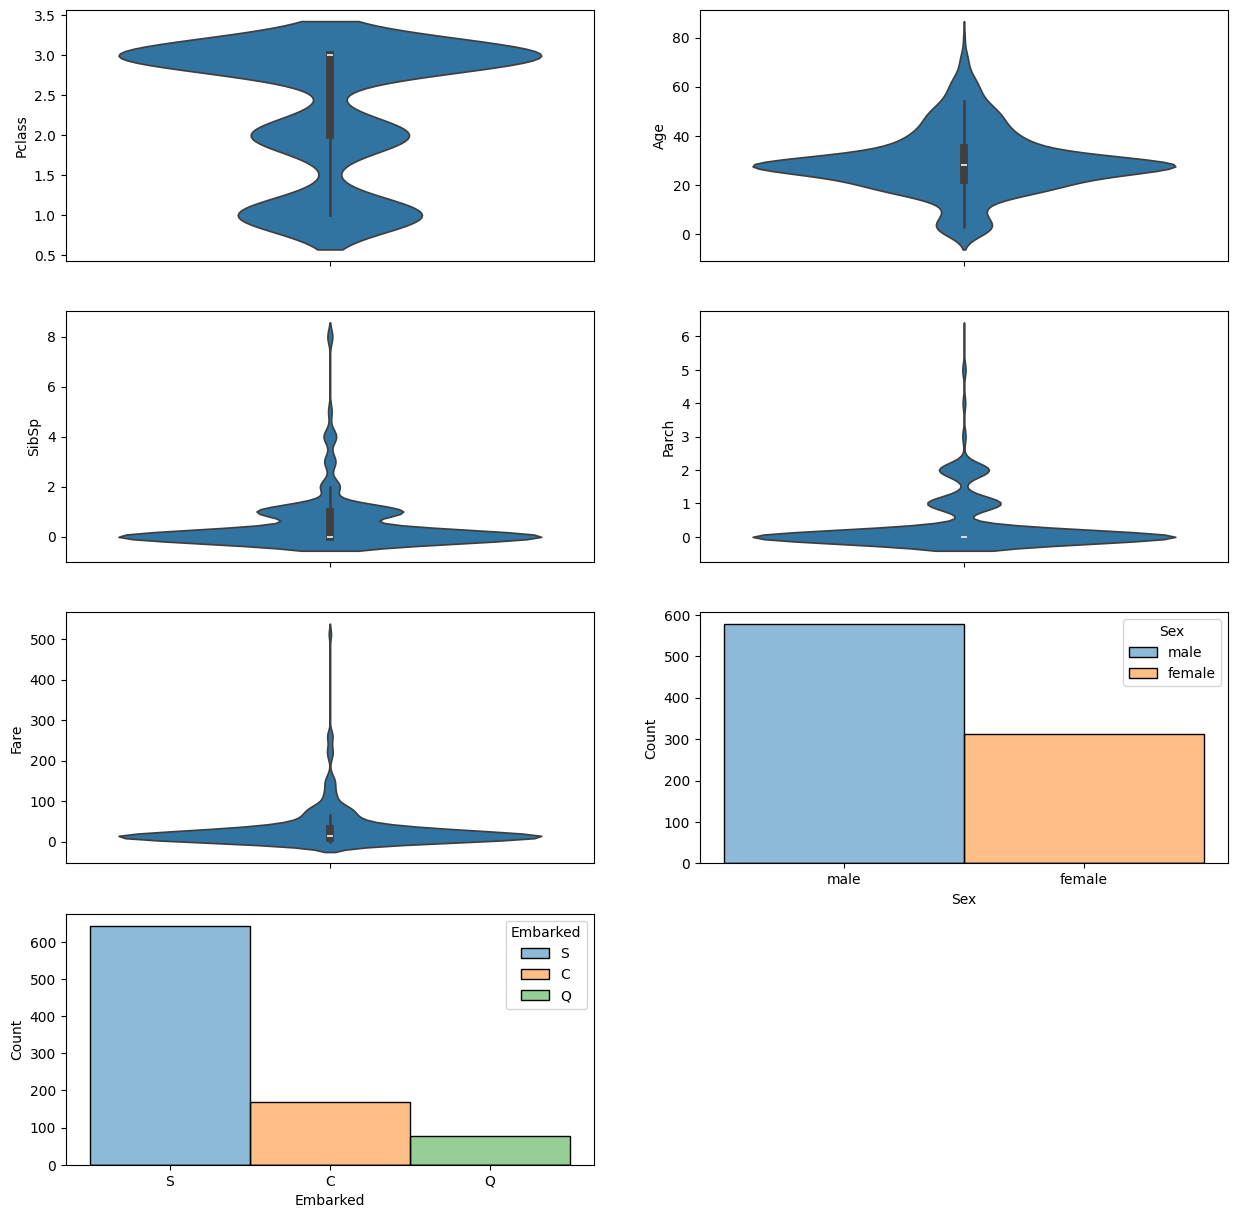

In [87]:
print(dane.describe())

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.violinplot(data=dane['Pclass'])
plt.subplot(4,2,2)
sns.violinplot(data=dane['Age'])
plt.subplot(4,2,3)
sns.violinplot(data=dane['SibSp'])
plt.subplot(4,2,4)
sns.violinplot(data=dane['Parch'])
plt.subplot(4,2,5)
sns.violinplot(data=dane['Fare'])
plt.subplot(4,2,6)
sns.histplot(data=dane, x="Sex", hue="Sex")
plt.subplot(4,2,7)
sns.histplot(data=dane, x="Embarked", hue="Embarked")

##### Analiza zmienności atrybutów w zależności od przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    549.00  549.00 549.00 549.00 549.00 549.00
mean       0.00    2.53  30.03   0.55   0.33  22.12
std        0.00    0.74  12.50   1.29   0.82  31.39
min        0.00    1.00   1.00   0.00   0.00   0.00
25%        0.00    2.00  23.00   0.00   0.00   7.85
50%        0.00    3.00  28.00   0.00   0.00  10.50
75%        0.00    3.00  35.00   1.00   0.00  26.00
max        0.00    3.00  74.00   8.00   6.00 263.00
       Survived  Pclass    Age  SibSp  Parch   Fare
count    340.00  340.00 340.00 340.00 340.00 340.00
mean       1.00    1.96  28.16   0.48   0.47  48.21
std        0.00    0.86  13.67   0.71   0.77  66.75
min        1.00    1.00   0.42   0.00   0.00   0.00
25%        1.00    1.00  21.00   0.00   0.00  12.44
50%        1.00    2.00  28.00   0.00   0.00  26.00
75%        1.00    3.00  35.00   1.00   1.00  56.95
max        1.00    3.00  80.00   4.00   5.00 512.33


Text(0.5, 1.0, 'Survived = 1')

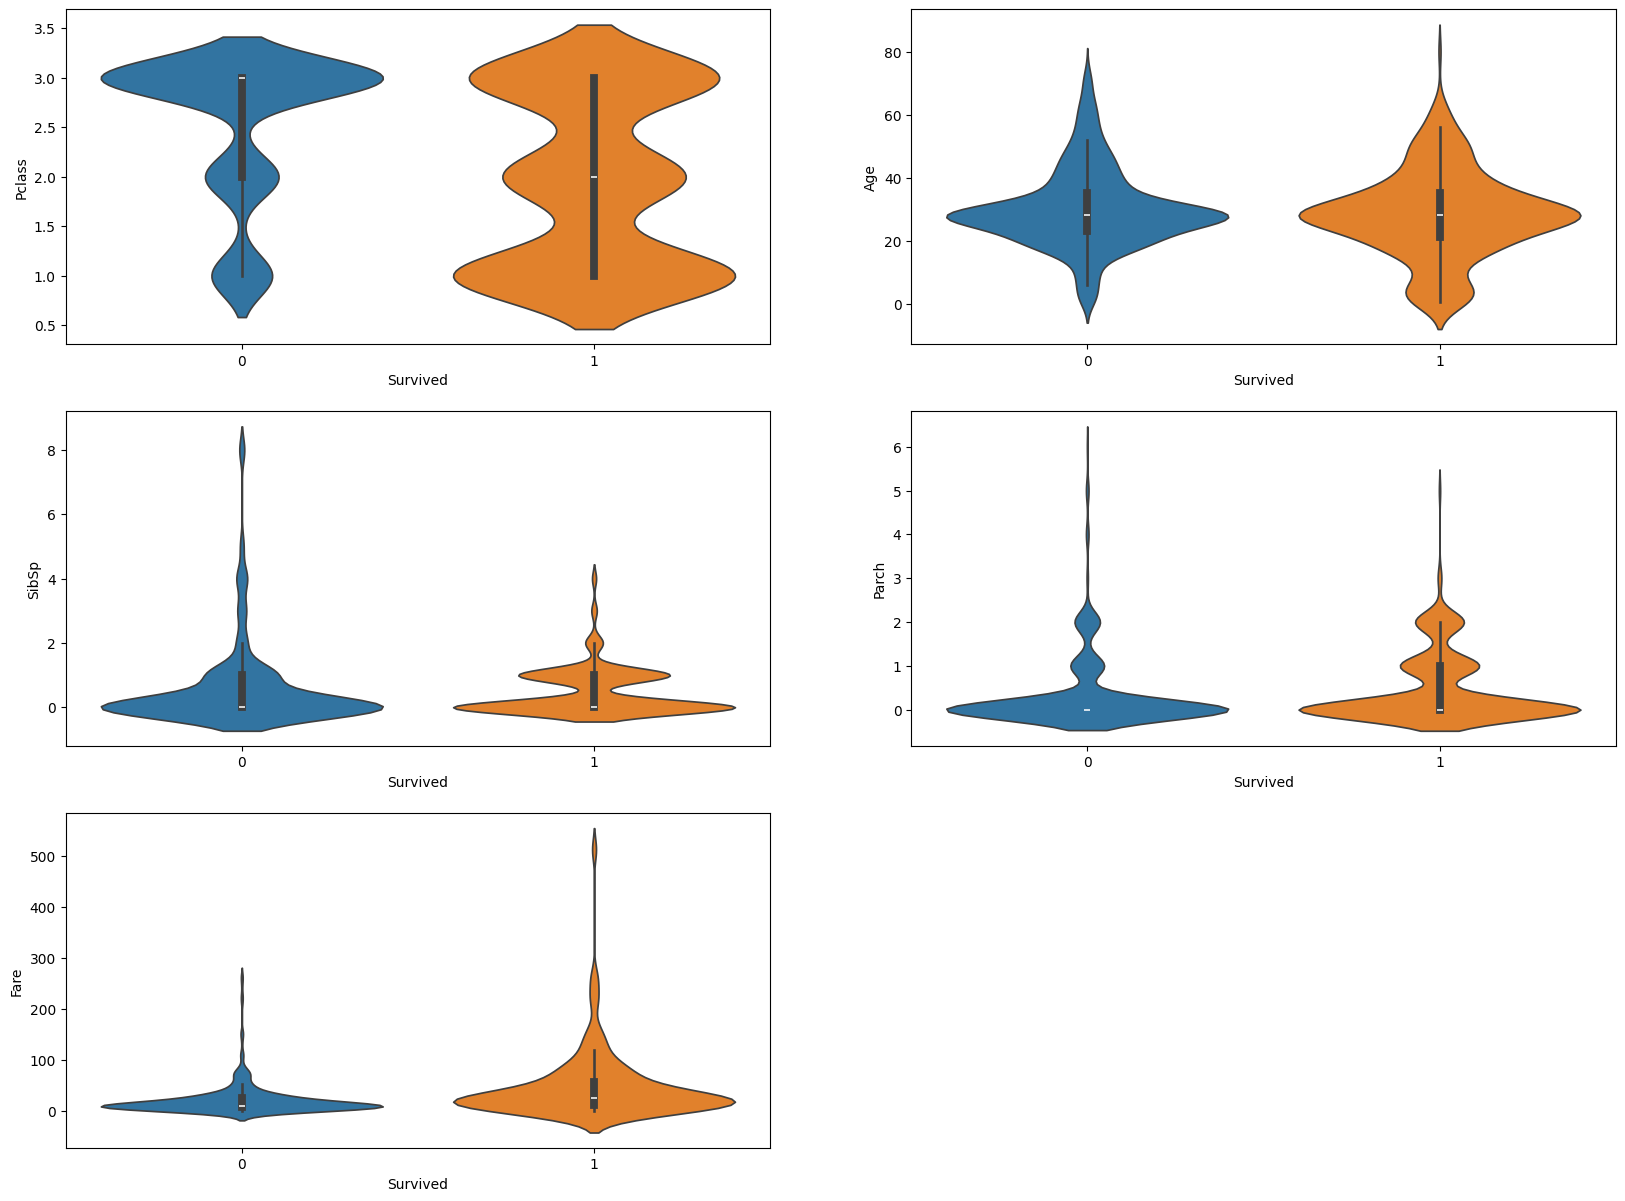

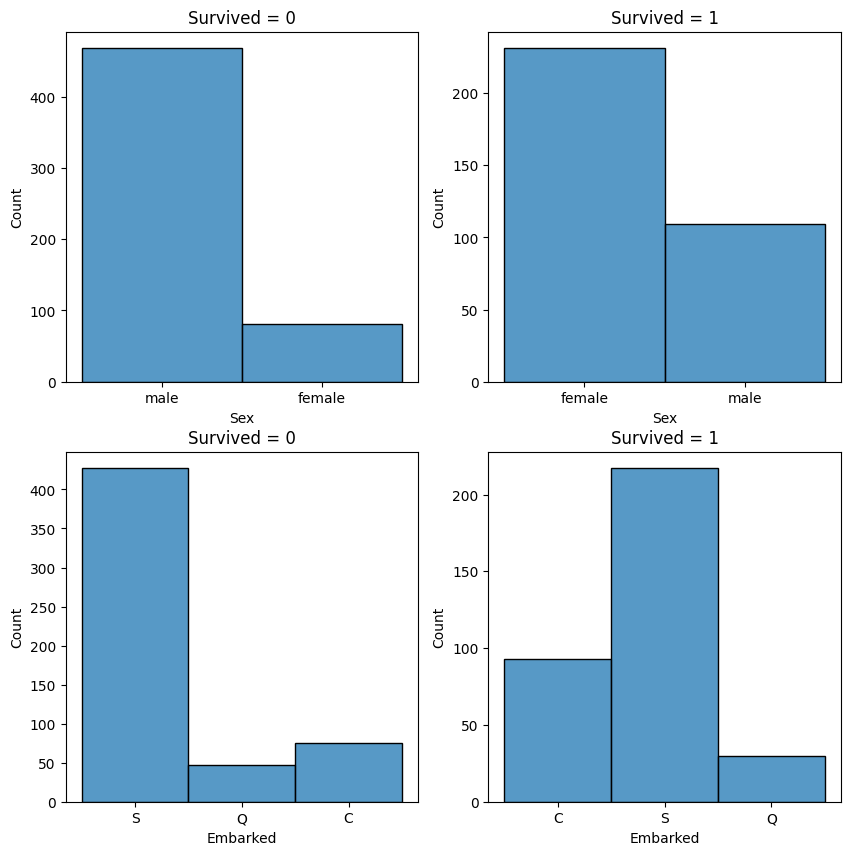

In [88]:
print(dane[dane['Survived'] == 0].describe())
print(dane[dane['Survived'] == 1].describe())
plt.figure(figsize= (20,20))
plt.subplot(4, 2, 1)
sns.violinplot(x = 'Survived', y = 'Pclass', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 2)
sns.violinplot(x = 'Survived', y = 'Age', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 3)
sns.violinplot(x = 'Survived', y = 'SibSp', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 4)
sns.violinplot(x = 'Survived', y = 'Parch', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 5)
sns.violinplot(x = 'Survived', y = 'Fare', data=dane, legend=False, hue = 'Survived')
plt.figure(figsize= (10,10))
plt.subplot(2, 2, 1)
sns.histplot(data=dane[dane['Survived'] == 0], x="Sex").set_title("Survived = 0")
plt.subplot(2, 2, 2)
sns.histplot(data=dane[dane['Survived'] == 1], x="Sex").set_title("Survived = 1")
plt.subplot(2, 2, 3)
sns.histplot(data=dane[dane['Survived'] == 0], x="Embarked").set_title("Survived = 0")
plt.subplot(2, 2, 4)
sns.histplot(data=dane[dane['Survived'] == 1], x="Embarked").set_title("Survived = 1")


##### Wykres punktowy

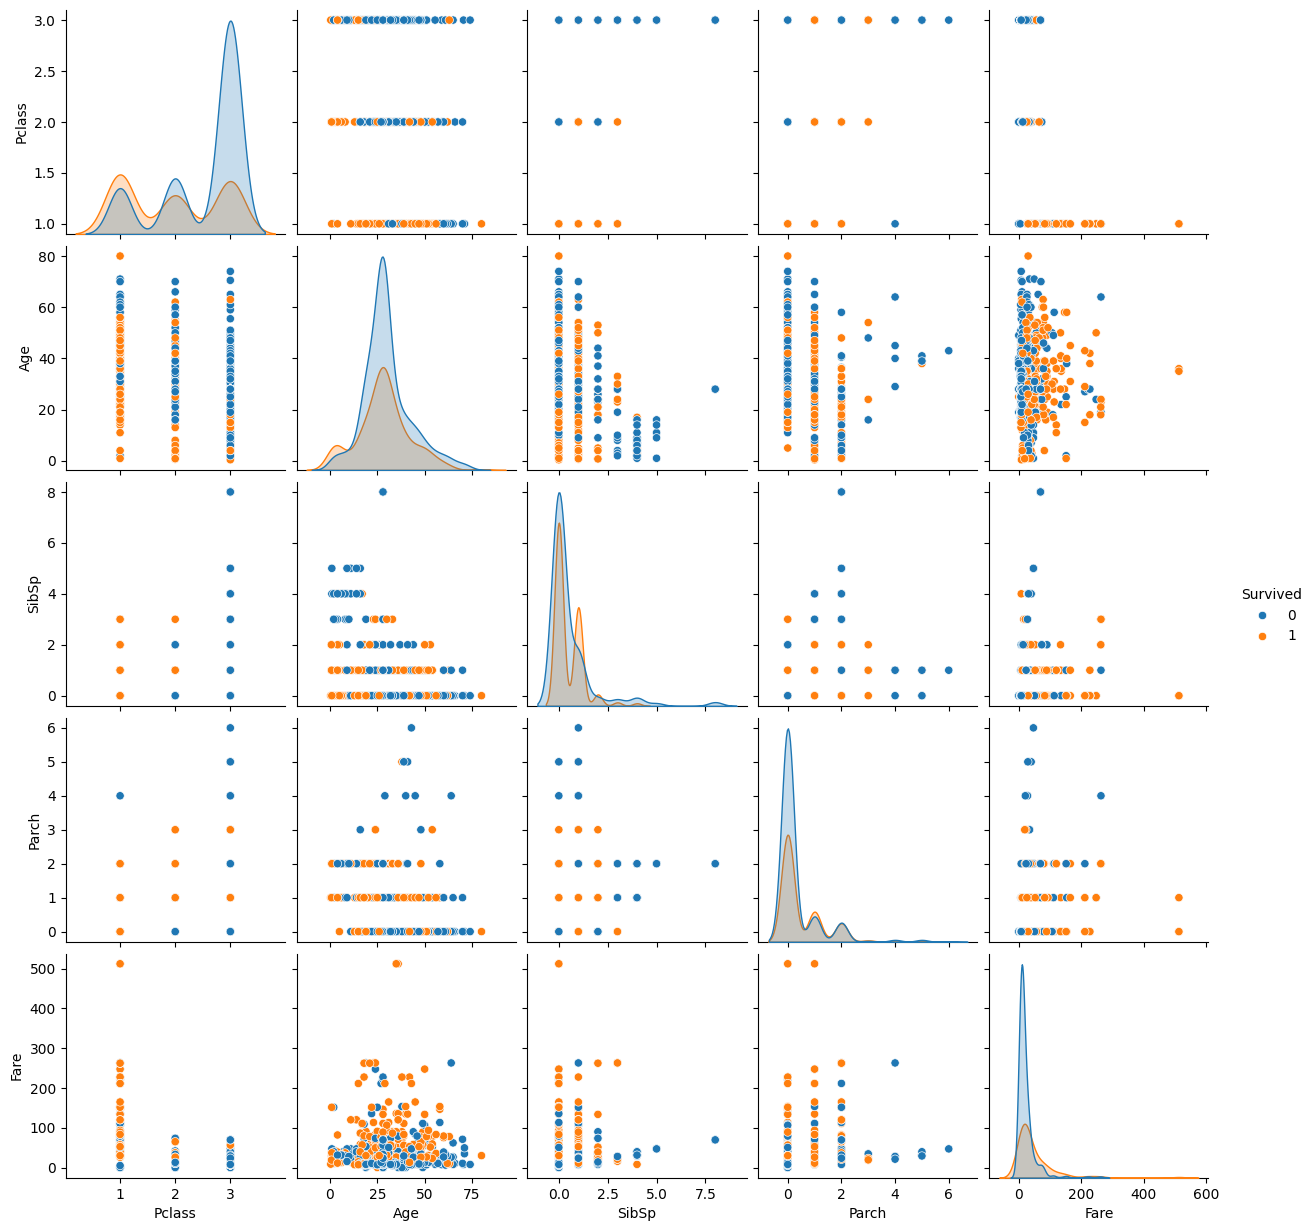

In [89]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

##### Korelacja

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.34   0.08   0.02 -0.55
Age          -0.07   -0.34  1.00  -0.23  -0.17  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.17   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


<Axes: >

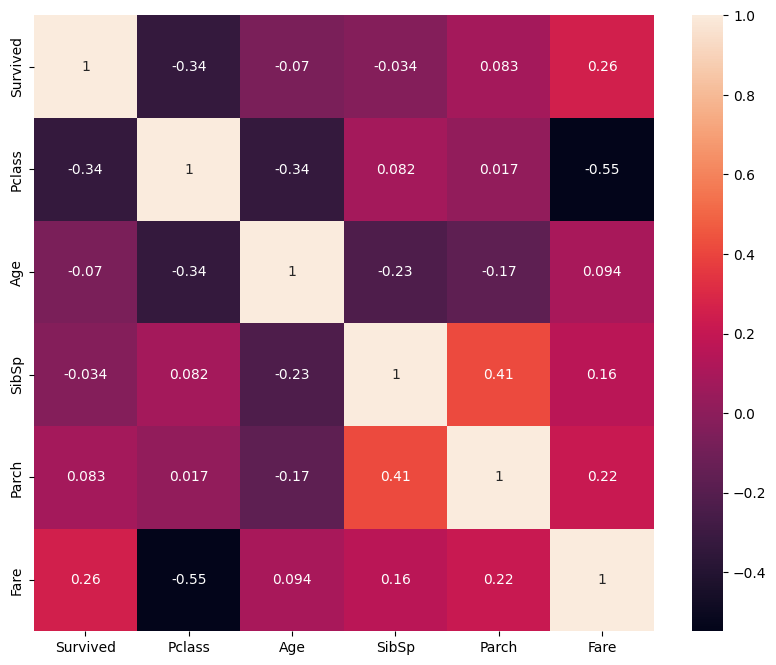

In [90]:
kor = dane.loc[:, np.logical_and(dane.columns != "Sex", dane.columns != "Embarked")].corr()
print(kor)
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

### Uczenie nadzorowane

Żeby wygodniej było prowadzić uczenie nadzorowane, zamieniamy wartości column Sex i Embarked na wartości liczbowe według następnego schematu:  
Sex - (male => 1, female => 0),  
Emarked - (C => 1, S => 2, Q => 3)

In [91]:
print(dane.head())

dane['Sex'] = np.where(dane['Sex'] == 'male', 1, 0)
dane['Embarked'] = np.where(dane['Embarked'] == 'C', 1, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'S', 2, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'Q', 3, dane['Embarked'])

print(dane.head())

   Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    male 22.00      1      0  7.25        S
1         1       1  female 38.00      1      0 71.28        C
2         1       3  female 26.00      0      0  7.92        S
3         1       1  female 35.00      1      0 53.10        S
4         0       3    male 35.00      0      0  8.05        S
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    1 22.00      1      0  7.25        2
1         1       1    0 38.00      1      0 71.28        1
2         1       3    0 26.00      0      0  7.92        2
3         1       1    0 35.00      1      0 53.10        2
4         0       3    1 35.00      0      0  8.05        2


Wykres punktowy, który pozwoli na określenie, które atrybuty są bardziej, a które mniej istotne w kontekscie uczenia nadzorowanego

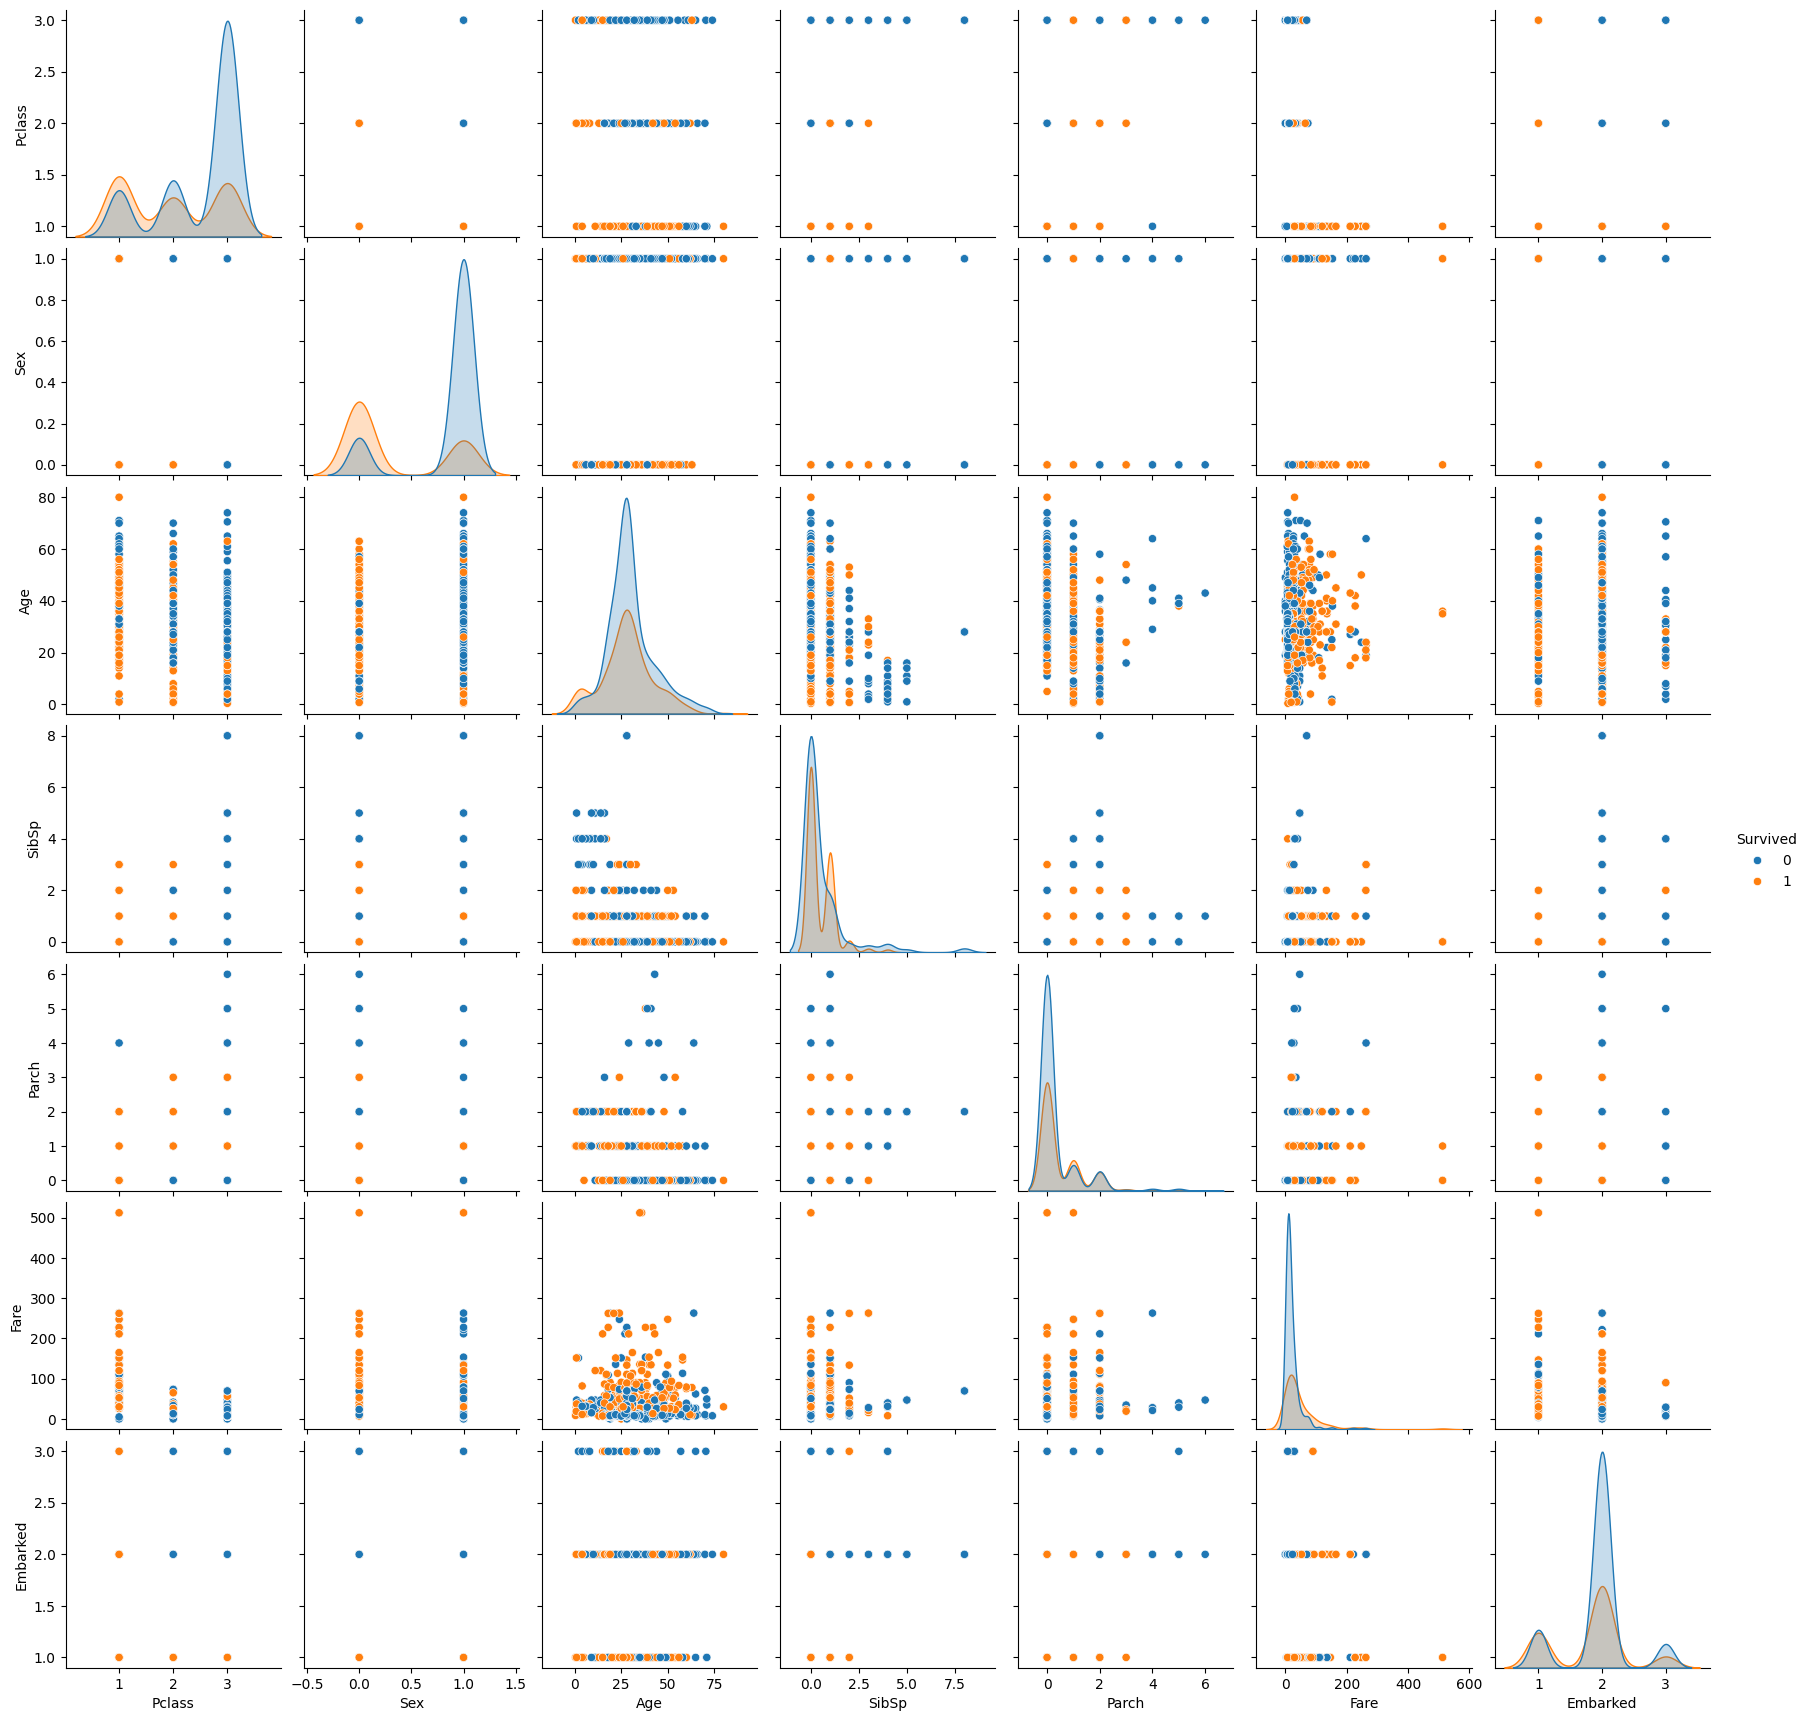

In [92]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

Z wykresu punktowego możemy wyciągnąć wniosek, że najbardziej istotnymi dla nas będą pary atrybutów: Sex i Pclass, Pclass i Embarked, Sex i Age, Fare i Sex, Sex i Embarked

Import niezbędnych pakietów oraz funkcje dzielenia zbioru na ucząct i testowy, weryfikacji i wyświtlenia granic

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}


def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    #print(model.score(dane['opis_ucz'],dane['dec_ucz']))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    #print(model.score(dane['opis_test'],dane['dec_test']))
    print(mp) 

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')




Wybrane pary atrybutów dla uczenia nadzorowanego i podział zbioru danych

In [94]:
atrybuty = [ ['Sex', 'Pclass'], ['Pclass', 'Embarked'], ['Sex', 'Age'], ['Fare', 'Sex'], ['Sex', 'Embarked']]

# podział zbioru danych
dane_podzielone = podziel(dane,0.3)

Metoda k-najbliższych sąsiadów.

macierz pomyłek - zbiór uczący, dokładność: 0.6543408360128617
[[  0  73  41]
 [  0 406  53]
 [  0  48   1]]
macierz pomyłek - zbiór testowy, dokładność: 0.6142322097378277
[[  0  36  18]
 [  0 164  21]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.9646302250803859
[[106   8   0]
 [  0 457   2]
 [  0  12  37]]
macierz pomyłek - zbiór testowy, dokładność: 0.8014981273408239
[[ 36  17   1]
 [ 18 163   4]
 [  0  13  15]]
macierz pomyłek - zbiór uczący, dokładność: 0.5707395498392283
[[ 31  43  40]
 [ 59 301  99]
 [  1  25  23]]
macierz pomyłek - zbiór testowy, dokładność: 0.5617977528089888
[[ 11  17  26]
 [ 20 128  37]
 [  0  17  11]]
macierz pomyłek - zbiór uczący, dokładność: 0.6221864951768489
[[ 13  60  41]
 [ 15 372  72]
 [  0  47   2]]
macierz pomyłek - zbiór testowy, dokładność: 0.5805243445692884
[[  6  25  23]
 [ 13 149  23]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.9694533762057878
[[104  10   0]
 [  1 450   8]
 [  0   0  49]]
macierz pomyłek

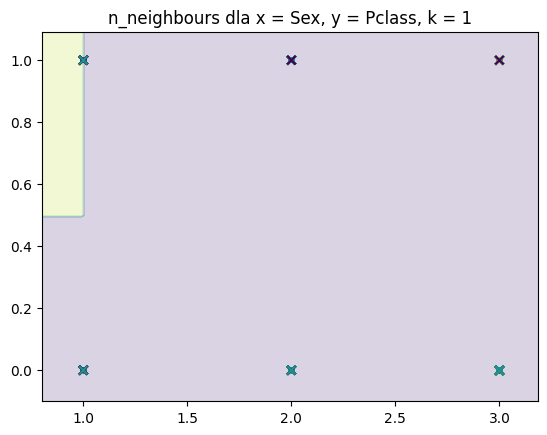

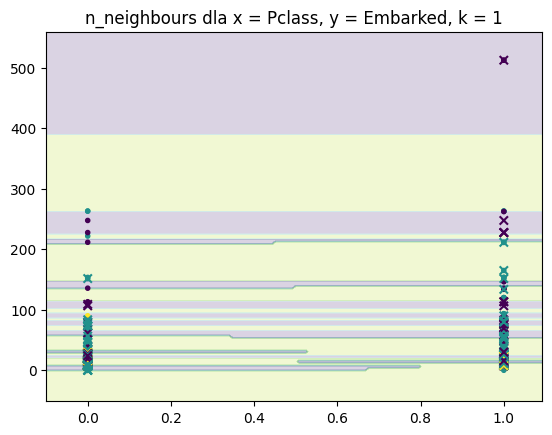

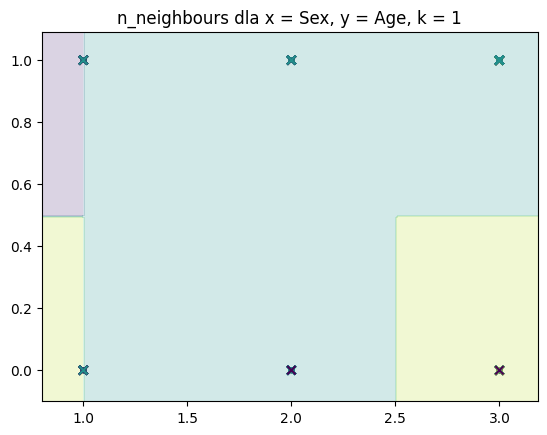

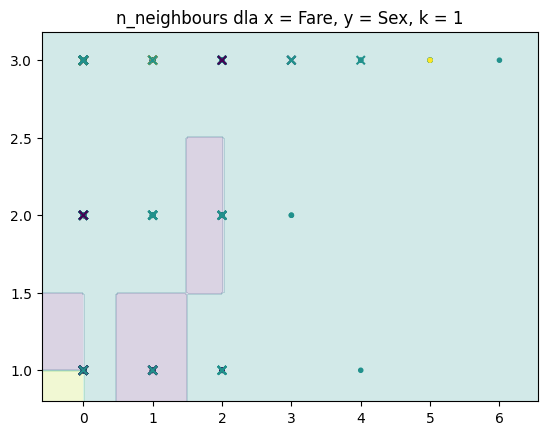

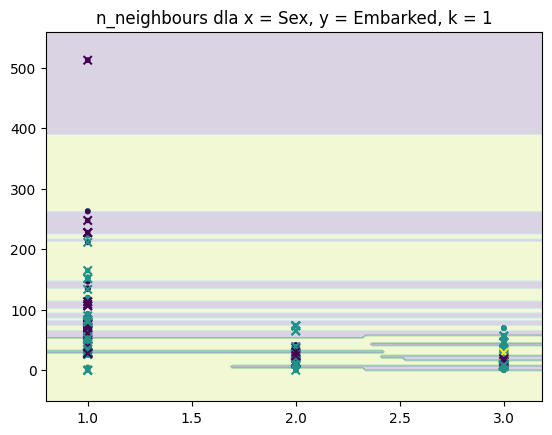

In [95]:
#wybór liczby sąsiadów
k = 1

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = KNeighborsClassifier(n_neighbors=k)

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2 + ", k = " + str(k))

Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.7379421221864951
[[  0 114   0]
 [  0 459   0]
 [  0  49   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.6928838951310862
[[  0  54   0]
 [  0 185   0]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7347266881028939
[[ 17  97   0]
 [ 19 440   0]
 [  0  49   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.704119850187266
[[  8  46   0]
 [  5 180   0]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7379421221864951
[[  0 114   0]
 [  0 459   0]
 [  0  49   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.6928838951310862
[[  0  54   0]
 [  0 185   0]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7379421221864951
[[  0 114   0]
 [  0 459   0]
 [  0  49   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.6928838951310862
[[  0  54   0]
 [  0 185   0]
 [  0  28   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7347266881028939
[[ 19  95   0]
 [ 21 438   0]
 [  0  49   0]]
macierz pomyłek 

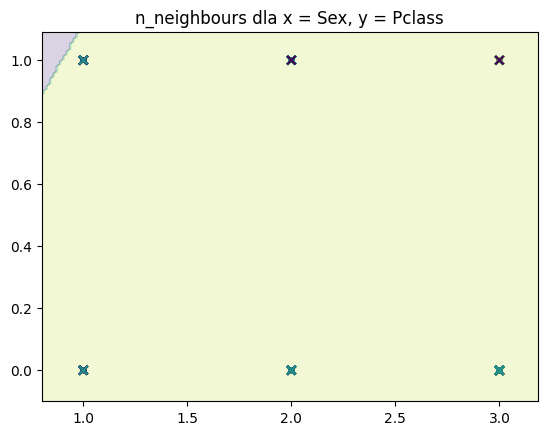

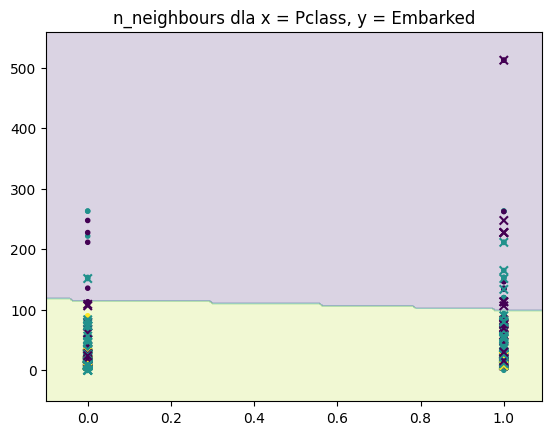

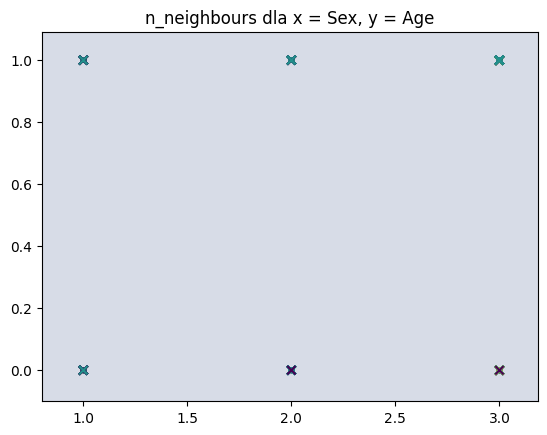

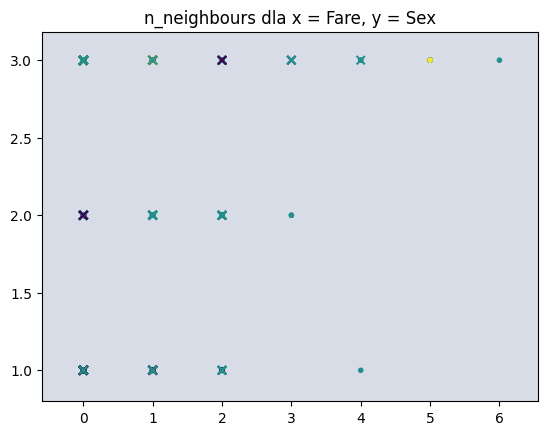

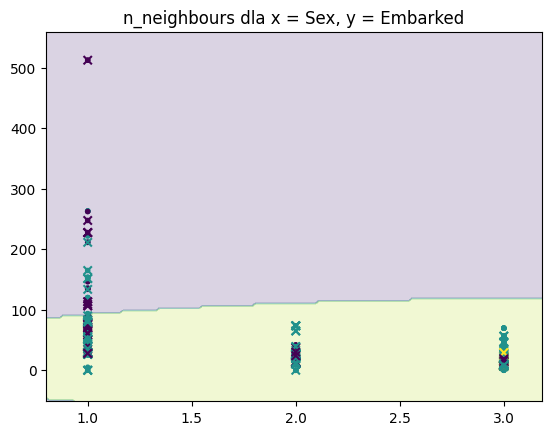

In [96]:
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = GaussianNB()

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2)